# DDO4MLA Practice 9

# Artificial Neural Networks — Feedforward Neural Network

## Introduction

This tutorial continues the discussion on the modeling and training of artificial neural networks. Previously, the perceptron and a single neuron with a sigmoid activation function were implemented. Now we consider a feedforward neural network that expands a single neuron by adding more neurons grouped in layers. An example of a simple network below serves as a starting point to getting familiar with feedforward multilayer neural networks and all the necessary terminology.

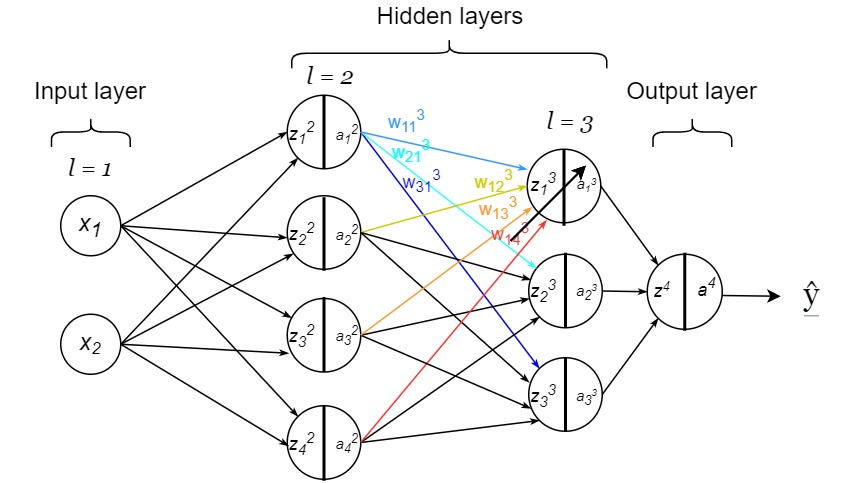

The first layer (layer number $l = 1$) is called the input layer. It does not have neurons, and its only purpose is to distribute inputs over neurons of the first hidden layer, which is the second layer of the network ($l = 2$). As before inputs are regarded as features describing certain properties of classified objects, e.g., color and size of different fruits and vegetables in the fruits-vegetables classification problem.

Inputs are transferred to the neurons of the first hidden layer, where they are used to compute the weighted inputs $z^2$ and the activation functions $a^2$ in these neurons (superscript corresponds to the layer number). Then values of the activation function in the first hidden layer are transferred to the neurons of the second hidden layer and used to compute weighted inputs and activation functions of its neurons. This process, so-called forward propagation or forward pass, continues up to the last layer also called the output layer. Activation $a^4$ (or activations if there are many neurons in the output layer) in the last layer is a prediction $\hat y$ of the network, which depends on the weights $w$ of neurons. Our objective is to adjust the weights so that predictions become accurate on the given data. 

Let us move on to the mathematical modeling of feedforward neural networks. The weighted input of the j-th neuron in the l-th layer is defined as:

$$z_j^l=\sum_{k=1}^{n_{l-1}}w^{l}_{jk}a_k^{l-1}+b_{j}^{l},$$

where $n_{l-1}$ is the number of neurons in the previous layer $l-1$, $w_{jk}^l$ is the k-th weight of the j-th neuron in the l-th layer, $a_k^{l-1}$ is the output of the k-th neuron in the previous layer $l-1$, and $b_j^l$ is the j-th neuron bias. The weight $w_{jk}^l$ connects the k-th neuron output from the previous layer $l-1$ to the j-th neuron of the current layer $l$. In contrast to the perceptron and a single artificial neuron, it is more convenient to add bias to each neuron as a separate parameter. That is why bias explicitly appears in the weighted input formula.

The output of the j-th neuron in the l-th layer is defined in terms of its corresponding weighted input as:

$$a_j^l=a(z_j^l),$$

where $a(\cdot)$ is the activation function.

The above formulas, along with variables and parameters, should be represented in a vector form to vectorize the mathematical model of a feedforward neural network. Let us first introduce the weight matrix containing the weights of all neurons in a given layer:

$$W^l=\begin{bmatrix}
  w_{11}^l & w_{12}^l & \dots & w_{1n_{l-1}}^l\\
  w_{21}^l & w_{22}^l & \dots & w_{2n_{l-1}}^l\\
  \vdots & \vdots & \ddots & \vdots\\
  w_{n_l1}^l & w_{n_l2}^l & \dots & w_{n_ln_{l-1}}^l
\end{bmatrix}\in\mathbb{R}^{n_l\times n_{l-1}},$$

where $n_{l-1}$ is the number of neurons in the previous layer $l-1$, and $n_l$ is the number of neurons in the l-th layer. Each row of this matrix contains the weights of a corresponding neuron. The number of rows is equal to the number of neurons in a layer, and the number of columns is the number of neurons in the previous layer. Therefore, the vector $b_l=\begin{bmatrix}b_1^l & b_2^l & \cdots & b_{n_l}^l\end{bmatrix}^T$ is a column-vector containing biases of neurons in the l-th layer. For example, take a closer look at layers 2 and 3 of the neural network:

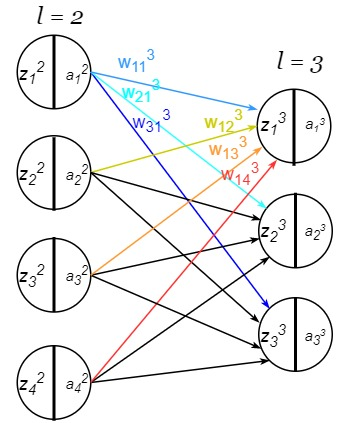

The weight matrix and the bias vector of the third layer, according to the previously introduced definitions, are, therefore:

$$W^3=\begin{bmatrix}
  w^3_{11} & w^3_{12} & w^3_{13} & w^3_{14}\\
  w^3_{21} & w^3_{22} & w^3_{23} & w^3_{24}\\
  w^3_{31} & w^3_{32} & w^3_{33} & w^3_{34}
\end{bmatrix},\quad b^3=\begin{bmatrix}b_1^3\\b_2^3\\b_3^3\end{bmatrix}.$$

The column-vector containing weighted inputs of all neurons in the l-th layer is defined as:

$$z^l=W^la^{l-1}+b^l,$$

where $a^{l-1}$ is the vector of all outputs of the previous layer. The column-vector containing outputs of the l-th layer is defined as:

$$a^l=a(z^l)=\begin{bmatrix}a(z_1^l)\\a(z_2^l)\\\vdots\\a(z_{n_l}^l)\end{bmatrix}\in\mathbb{R}^{n_l},$$

where $a(z^l)$ is the activation function $a(\cdot)$ applied to each element of the vector $z^l$.

Using formulas of the weighted input $z^l$ and the output $a^l$, one can calculate activations of all layers from the input layer to the output layer, i.e., perform forward propagation:

$$\begin{align}
a^1&=x,\\
z^2&=W^2a^1+b^2,\\
a^2&=a(z^2),\\
&\vdots\\
z^L&=W^La^{L-1}+b^L,\\
a^L&=a(z^L),
\end{align}$$

or more succinctly:

$$a^L=a(W^L(\dots a(W^2x+b^2)\dots)+b^L),$$

where $L$ is the number of layers in a network, and $x$ is a column-vector of inputs.

## Exercise 1

To train such a network, the loss function is needed along with its gradient w.r.t. all weights and biases of the network. Applying the formulas above to a given sample, we can propagate the inputs through the network and get the prediction and error between prediction and label value defined by the loss function. After that, the gradients are computed using so-called backpropagation starting from the output layer. The gradients are computed by propagating error from the output layer back to the input layer hence the name. First, let us define the error to be propagated:

$$\delta_j^l=\frac{\partial J}{\partial z_j^l},$$

where $\delta_j^l$ is the error gradient of the j-th neuron in the l-th layer, and $J(\cdot)$ is the loss function. As it can be seen, the error gradient of the j-th neuron in the l-th layer is equal to the partial derivative of the loss function w.r.t. to the weighted input of this neuron. The weighted input is used, since it has all the weights and biases of a given neuron so that partial derivatives of the loss function w.r.t. a certain weight or bias can be found by the chain rule, provided that the error gradient is known. In a vector form, the error gradient is as follows:

$$\delta^l=\frac{\partial J}{\partial z^l}=\begin{bmatrix}\frac{\partial J}{\partial z_1^l}\\\frac{\partial J}{\partial z_2^l}\\\vdots\\\frac{\partial J}{\partial z_{n_l}^l}\end{bmatrix}\in\mathbb{R}^{n_l}.$$

### Task 1.1

We define the partial derivative of the loss function with respect to the weights $W^l$ as follows:

$$\frac{\partial J}{\partial W^l}=\begin{bmatrix}
  \frac{\partial J}{\partial W_{11}^l} & \frac{\partial J}{\partial W_{12}^l} & \cdots & \frac{\partial J}{\partial W_{1n_{l-1}}^l}\\
  \frac{\partial J}{\partial W_{21}^l} & \frac{\partial J}{\partial W_{22}^l} & \cdots & \frac{\partial J}{\partial W_{2n_{l-1}}^l}\\
  \vdots & \vdots & \ddots & \vdots\\
  \frac{\partial J}{\partial W_{n_l1}^l} & \frac{\partial J}{\partial W_{n_l2}^l} & \cdots & \frac{\partial J}{\partial W_{n_ln_{l-1}}^l}\\
\end{bmatrix}\in\mathbb{R}^{n_l\times n_{l-1}}.$$

The definition above makes it easier to use this derivative while working with the gradient descent, since one can simply subtract $\frac{\partial J}{\partial W^l}$ multiplied by a learning rate from the matrix $W^l$ to update this parameter.

Use the cell below to derive $\frac{\partial J}{\partial W^l}$ in terms of the error gradient $\delta^l$ and the previous layer output $a^{l-1}$. You can start with deriving $\frac{\partial J}{\partial W_{jk}^l}$ where the chain rule must be employed. Use the identities of [matrix calculus](https://en.wikipedia.org/wiki/Matrix_calculus), and make sure to use [denominator layout](https://en.wikipedia.org/wiki/Matrix_calculus#Denominator-layout_notation:~:text=bmatrix%7D%7D.%5Cend%7Baligned%7D%7D%7D-,Denominator%2Dlayout%20notation,-%5Bedit%5D) for compatibility of the partial derivative $\frac{\partial J}{\partial W^l}$ with the weight matrix $W^l$.

**ToDo**

According to the chain rule (assuming denominator layout):

$$\frac{\partial J}{\partial w_{jk}^l}=\frac{\partial z^l}{\partial w_{jk}^l}\frac{\partial J}{\partial z^l}=\frac{\partial z^l}{\partial w_{jk}^l}\delta^l.\tag{1}$$

The first term $\frac{\partial z^l}{\partial w_{jk}^l}$ is a row-vector, namely:

$$\frac{\partial z^l}{\partial w_{jk}^l}=\begin{bmatrix}\frac{\partial z_1^l}{\partial w_{jk}^l} & \frac{\partial z_2^l}{\partial w_{jk}^l} & \cdots \frac{\partial z_{n_l}^l}{\partial w_{jk}^l}\end{bmatrix}.\tag{2}$$

Let us derive $\frac{\partial z_i^l}{\partial w_{jk}^l}$ for arbitrary $i$:

$$\frac{\partial z_i^l}{\partial w_{jk}^l}=\frac{\partial}{\partial w_{jk}^l}\bigg(\sum_{h=1}^{n_{l-1}}w_{ih}^{l}a_h^{l-1}+b_{i}^{l}\bigg)=\sum_{h=1}^{n_{l-1}}a_h^{l-1}\frac{\partial}{\partial w_{jk}^l}\bigg(w_{ih}^{l}\bigg),\tag{3}$$

if $j\neq i$ the whole expression yields zero, otherwise there is $w_{ih}^l$ such that $h=k$ which results in $a_k^{l-1}$, i.e.:

$$\frac{\partial z_i^l}{\partial w_{jk}^l}=\delta_{ij}a_k^{l-1},\tag{4}$$

where $\delta_{ij}$ is [Kronecker delta](https://en.wikipedia.org/wiki/Kronecker_delta) function.

Let us calculate (1), taking into account that components constituting (2) are given as (4):

$$\frac{\partial J}{\partial w_{jk}^l}=\sum_{i=1}^{n_l}\delta_{ij}a_k^{l-1}\delta_i^l=a_k^{l-1}\delta_j^l\tag{5}.$$

According to the definition above, each term of $\frac{\partial J}{\partial W^l}$ is equal to (5). Hence, it is the following outer product:

$$\frac{\partial J}{\partial W^l}=\delta^l(a^{l-1})^T.\tag{6}$$

The final expression should be:

$$\frac{\partial J}{\partial W^l}=\delta^l(a^{l-1})^T.$$

### Task 1.2

Use the cell below to derive $\frac{\partial J}{\partial b^l}$ in terms of the error gradient $\delta^l$.

**ToDo**

Applying the chain rule and using matrix calculus identities gives:

$$\frac{\partial J}{\partial b^l}=\frac{\partial z^l}{\partial b^l}\frac{\partial J}{\partial z^l}=\frac{\partial}{\partial b^l}\bigg(W^la^{l-1}+b^l\bigg)\delta^l=\frac{\partial}{\partial b^l}\bigg(W^la^{l-1}+Ib^l\bigg)\delta^l=\frac{\partial}{\partial b^l}\bigg(Ib^l\bigg)\delta^l=I\delta^l=\delta^l,$$

where $I\in\mathbb{R}^{n_l\times n_l}$ is the identity matrix.

The final expression should be:

$$\frac{\partial J}{\partial b^l}=\delta^l$$

## Exercise 2

The gradients derived above require the error gradient $\delta^l$. Let us first derive it for the last layer $L$. Applying the chain rule gives:

$$\delta^L=\frac{\partial J}{\partial z^L}=\frac{\partial a^L}{\partial z^L}\frac{\partial J}{\partial a^L}.$$

The first term is a partial derivative of the column-vector containing activation function evaluated at each component of $z^L$ w.r.t. the column-vector $z^L$. Assuming denominator layout the expression continues:

$$\frac{\partial a^L}{\partial z^L}=\begin{bmatrix}
  \frac{\partial}{\partial z_1^l}a(z_1^l) & \frac{\partial}{\partial z_1^l}a(z_2^l) & \cdots & \frac{\partial}{\partial z_1^l}a(z_{n_l}^l)\\
  \frac{\partial}{\partial z_2^l}a(z_1^l) & \frac{\partial}{\partial z_2^l}a(z_2^l) & \cdots & \frac{\partial}{\partial z_2^l}a(z_{n_l}^l)\\
  \vdots & \vdots & \ddots & \vdots\\
  \frac{\partial}{\partial z_{n_l}^l}a(z_1^l) & \frac{\partial}{\partial z_{n_l}^l}a(z_2^l) & \cdots & \frac{\partial}{\partial z_{n_l}^l}a(z_{n_l}^l)\\
\end{bmatrix}=\begin{bmatrix}
  a'(z_1^l) & 0 & \cdots & 0\\
  0 & a'(z_2^l) & \cdots & 0\\
  \vdots & \vdots & \ddots & \vdots\\
  0 & 0 & \cdots & a'(z_{n_l}^l)\\
\end{bmatrix},$$

where $a'(\cdot)$ is a derivative of the activation function $a(\cdot)$.

Multiplying a vector by a diagonal matrix is equivalent to the element-wise multiplication of that vector by another vector comprised of diagonal elements of that matrix, therefore:

$$\delta^L=a^{L(I)}\odot\frac{\partial J}{\partial a^L},$$

where $a^{L(I)}=\begin{bmatrix}a'(z_1^l) & a'(z_2^l) & \cdots & a'(z_{n_l}^l)\end{bmatrix}^T$ is a column-vector containing derivatives of the activation function evaluated on the weighted inputs $z^l$.

Now let us derive the error gradient $\delta^{L-1}$ of the previous layer $L-1$. Applying the chain rule (denominator layout) gives:

$$\delta^{L-1}=\frac{\partial J}{\partial z^{L-1}}=\frac{\partial a^{L-1}}{\partial z^{L-1}}\frac{\partial z^{L}}{\partial a^{L-1}}\frac{\partial a^L}{\partial z^L}\frac{\partial J}{\partial a^L}=a^{L-1(I)}\odot\frac{\partial}{\partial a^{L-1}}\bigg(W^La^{L-1}+b^L\bigg)\delta^L=a^{L-1(I)}\odot(W^L)^T\delta^L$$

One can show that the recursive formula to compute $\delta^l$ based on $\delta^{l+1}$ is:

$$\delta^l=a^{l(I)}\odot(W^{l+1})^T \delta^{l+1}.$$

### Task 2.1

Consider the following simple loss function which uses only one sample:

$$J=\frac{1}{2}(a^L-y)^2,$$

where $a^L$ is a single network output (scalar), $L$ is the number of layers, and $y$ is the ground truth.

Assume that the network uses a sigmoid activation function, i.e., $a(\cdot)=\sigma(\cdot)$. Calculate the error gradient $\delta^L$ of the last layer in the cell below.

**ToDo**

Using the error gradient formula and sigmoid activation function derivative:

$$\delta^L=a^{L(I)}\odot\frac{\partial J}{\partial a^L}=\sigma(z^L)\odot(1-\sigma(z^L))\odot(\sigma(z^L)-y)=a^L\odot(1-a^L)\odot(a^L-y).$$

## Exercise 3

The algorithm to compute the gradients of the loss function w.r.t. the parameters of the network is as follows:


1.   Perform forward propagation to compute all $z^l$, $a^l$ and $a^{l(I)}$;
2.   Perform backpropagation by the following steps:

  2.1.   Compute the error gradient of the last layer $\delta^L$;

  2.2.   Recursively compute error gradients of other layers;

  2.3.   Compute the partial derivatives $\frac{\partial J}{\partial W^l}$ and $\frac{\partial J}{\partial b^l}$ for all layers.





Let us work through the steps of this algorithm on a specific example of the network mentioned previously. The figure below depicts a network with weights (edges) and biases (circles) values. The activation function is assumed to be a sigmoid function, and the loss function is taken from **Task 2.1**.

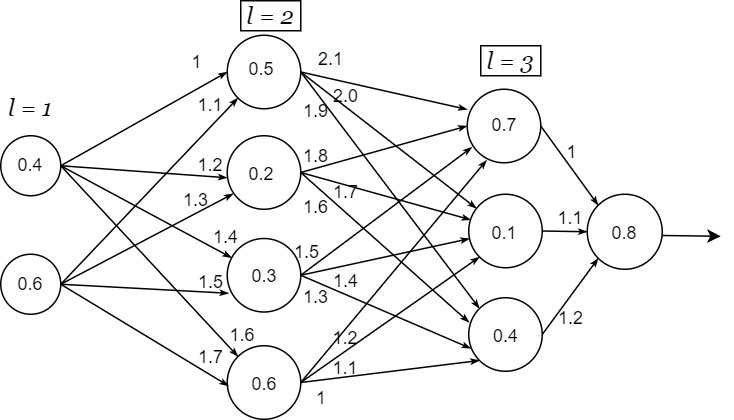

The cell below defines one sample of the dataset, and the initial parameters of the network.

In [1]:
import numpy as np

# Test sample
x = np.array([0.4, 0.6]).reshape((-1, 1))
y = 0

# Parameters of the 2-nd layer
W2 = np.array([[1.0, 1.1], [1.2, 1.3], [1.4, 1.5], [1.6, 1.7]])
b2 = np.array([[0.5, 0.2, 0.3, 0.6]]).T

# Parameters of the 3-rd layer
W3 = np.array([[2.1, 1.8, 1.5, 1.2], [2.0, 1.7, 1.4, 1.1], [1.9, 1.6, 1.3, 1.0]])
b3 = np.array([[0.7, 0.1, 0.4]]).T

# Parameters of the 4-th layer
W4 = np.array([[1.0, 1.1, 1.2]])
b4 = np.array([0.8])

Let us define the functions to compute the weighted input $z^l$, a sigmoid function $\sigma(\cdot)$, and its derivative $\sigma'(\cdot)$ in the cell below.

In [2]:
def z(X, W, b):
  """
  Computes a column-vector of weighted inputs
  Arguments:
      X: a matrix of input samples
      W: a weight matrix
      b: a bias vector
  Returns:
      A column-vector of weighted inputs
  """
  return W.dot(X) + b

def sigma(a):
  """
  Computes a sigmoid function
  Arguments:
      a: an argument of the function
  Returns:
      A return value of the function
  """
  return 1 / (1 + np.exp(-a))

def sigma_prime(a):
  """
  Computes a derivative of a sigmoid function
  Arguments:
      a: an argument of the function
  Returns:
      A return value of the function derivative
  """
  return sigma(a) * (1 - sigma(a))

### Task 3.1

Complete the forward propagation in the cell below. The output should be `[[0.98348277]]`.

In [3]:
# ToDo: the weighted inputs and the outputs of the second layer
z2 = z(x, W2, b2)
a2 = sigma(z2)

# ToDo: the weighted inputs and the outputs of the third layer
z3 = z(a2, W3, b3)
a3 = sigma(z3)

# ToDo: the weighted inputs and the outputs of the fourth layer
z4 = z(a3, W4, b4)
a4 = sigma(z4)

# Print the prediction
print(a4)

[[0.98348277]]


### Task 3.2

Complete the backpropagation in the cell below. The output should be:


```
[[5.97749450e-05]
 [5.40047716e-05]
 [3.62726714e-05]
 [1.93492535e-05]]
[[3.03413939e-05]
 [8.49072147e-05]
 [9.63356231e-05]]
[[0.0159761]]
```



In [4]:
# ToDo: the error gradient of the fourth layer
d4 = sigma_prime(z4) * (a4 - y)

# ToDo: the error gradient of the third layer
d3 = sigma_prime(z3) * W4.T.dot(d4)

# ToDo: the error gradient of the second layer
d2 = sigma_prime(z2) * W3.T.dot(d3)

# Print the error gradients
print(d2)
print(d3)
print(d4)

[[5.97749450e-05]
 [5.40047716e-05]
 [3.62726714e-05]
 [1.93492535e-05]]
[[3.03413939e-05]
 [8.49072147e-05]
 [9.63356231e-05]]
[[0.0159761]]


### Task 3.3

Complete the code below to compute the gradients w.r.t. the parameters of the network. The output should be:


```
[[0.0159457  0.01589853 0.01589541]]
[[2.50727126e-05 2.46230326e-05 2.58875704e-05 2.74744244e-05]
 [7.01633616e-05 6.89049791e-05 7.24436558e-05 7.68843007e-05]
 [7.96072652e-05 7.81795059e-05 8.21944843e-05 8.72328346e-05]]
[[2.39099780e-05 3.58649670e-05]
 [2.16019086e-05 3.24028630e-05]
 [1.45090686e-05 2.17636029e-05]
 [7.73970138e-06 1.16095521e-05]]
[[0.0159761]]
[[3.03413939e-05]
 [8.49072147e-05]
 [9.63356231e-05]]
[[5.97749450e-05]
 [5.40047716e-05]
 [3.62726714e-05]
 [1.93492535e-05]]
```



In [6]:
# Gradient w.r.t. the 4-th layer weights
dJdW4 = d4.dot(a3.T)

# Gradient w.r.t. the 3-rd layer weights
dJdW3 = d3.dot(a2.T)

# Gradient w.r.t. the 2-nd layer weights
dJdW2 = d2.dot(x.T)

# Print the gradients w.r.t. weights
print(dJdW4)
print(dJdW3)
print(dJdW2)

# Gradient w.r.t. the 4-th layer biases
dJdb4 = d4

# Gradient w.r.t. the 3-rd layer biases
dJdb3 = d3

# Gradient w.r.t. the 2-nd layer biases
dJdb2 = d2

# Print the gradients w.r.t. biases
print(dJdb4)
print(dJdb3)
print(dJdb2)

[[0.0159457  0.01589853 0.01589541]]
[[2.50727126e-05 2.46230326e-05 2.58875704e-05 2.74744244e-05]
 [7.01633616e-05 6.89049791e-05 7.24436558e-05 7.68843007e-05]
 [7.96072652e-05 7.81795059e-05 8.21944843e-05 8.72328346e-05]]
[[2.39099780e-05 3.58649670e-05]
 [2.16019086e-05 3.24028630e-05]
 [1.45090686e-05 2.17636029e-05]
 [7.73970138e-06 1.16095521e-05]]
[[0.0159761]]
[[3.03413939e-05]
 [8.49072147e-05]
 [9.63356231e-05]]
[[5.97749450e-05]
 [5.40047716e-05]
 [3.62726714e-05]
 [1.93492535e-05]]
